<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [2]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [3]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

--2023-08-14 14:23:48--  http://titanic.csv/
Resolving titanic.csv (titanic.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘titanic.csv’
--2023-08-14 14:23:48--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.007s  

2023-08-14 14:23:48 (8.67 MB/s) - ‘titanic.csv’ saved [61194/61194]

FINISHED --2023-08-14 14:23:48--
Total wall clock time: 0.3s
Downloaded: 1 files, 60K in 0.007s (8.67 MB/s)


### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [6]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv('titanic.csv')
des = df.describe()
des.loc['NaN'] = df.isna().sum()
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
NaN,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000


In [7]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df_rec = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [63]:
# Alumno, elimine aquellas filas que tengan columnas vacias
df_clean = df_rec.dropna()
df_clean

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
885,0,3,female,39.0,0,5
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
889,1,1,male,26.0,0,0


In [64]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
df_clean.shape[0]

714

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [65]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


<Axes: xlabel='Survived', ylabel='count'>

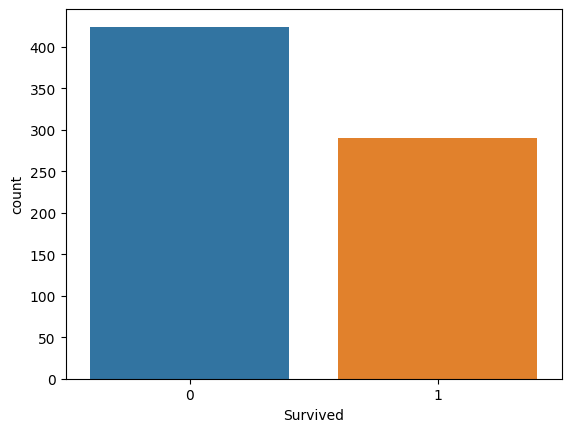

In [66]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
sns.countplot(x=df_clean.Survived)


<Axes: xlabel='Survived', ylabel='count'>

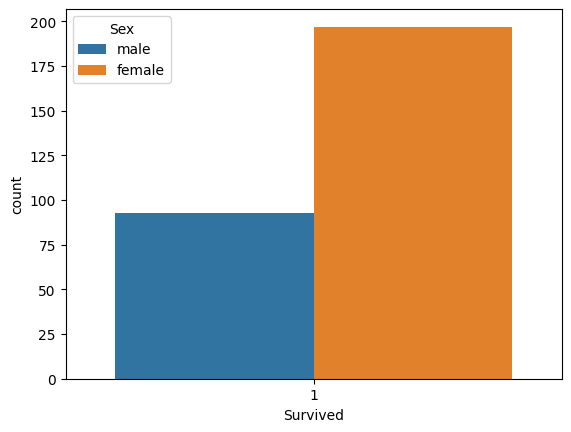

In [41]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(x=df_clean.Survived[df_clean.Survived == 1], hue=df_clean['Sex'])

<Axes: xlabel='Pclass', ylabel='count'>

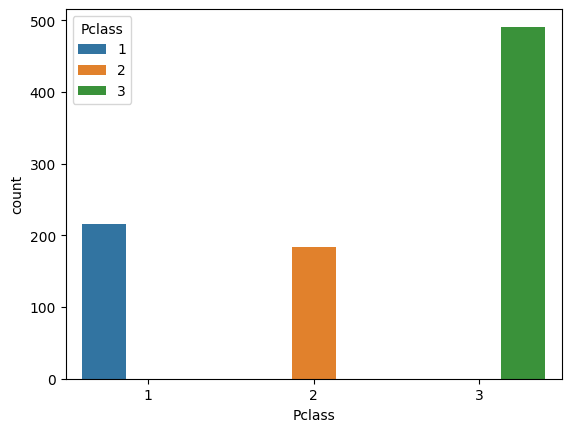

In [43]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
sns.countplot(x=df['Pclass'], hue=df['Pclass'])

<Axes: xlabel='Pclass', ylabel='count'>

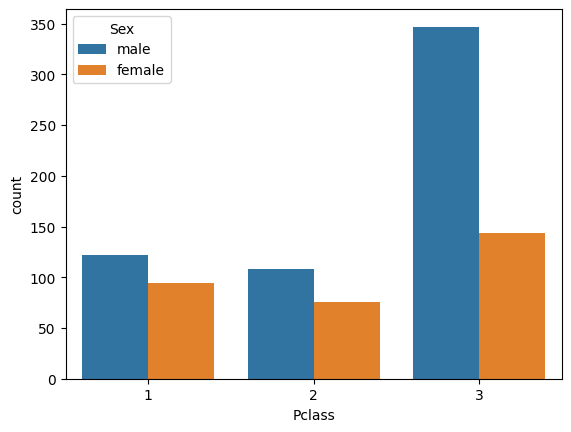

In [47]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(x=df['Pclass'], hue=df['Sex'])

#### Transformar variables categóricas texto a clases numeradas

In [48]:
from sklearn.preprocessing import LabelEncoder

In [67]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df_clean.copy()

In [68]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
le = LabelEncoder()
sex_codif = le.fit_transform(df_cod['Sex'])
df_cod['Sex_le'] = sex_codif
df_cod.drop(['Sex'], axis=1, inplace=True)

In [69]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
le.classes_

array(['female', 'male'], dtype=object)

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [71]:
# Alumno, genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X = df_cod.drop('Survived', axis=1).values
y = df_cod['Survived'].values

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [72]:
# Alumno, generar los dataset de train y test superando en 70%30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
# Alumno, entrene un clasificador cualquier sea con los datos de train
# Genere las predicciones y_hat con el dataset de test
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=8, max_depth=5, criterion='entropy', random_state=0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# Alumno, calcular la exactitud (accuracy) de su clasificador
# Debe superar el modelo base (50%)
accuracy_score(y_test, y_hat)

0.8

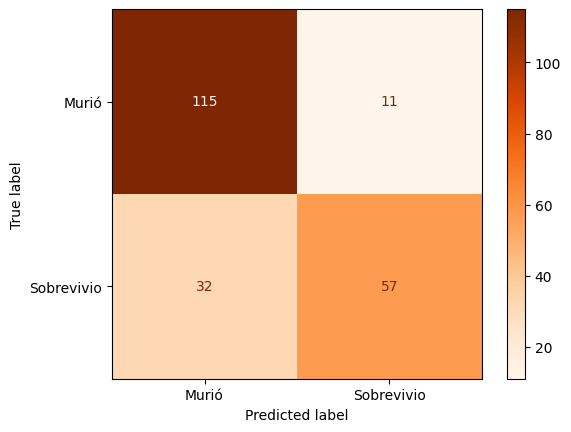

In [78]:
# Alumno, dibujar la matriz de confusion
cm = confusion_matrix(y_test, y_hat)

cmd = ConfusionMatrixDisplay(cm, display_labels=['Murió', 'Sobrevivio'])
cmd.plot(cmap=plt.cm.Oranges)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [109]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
df_prueba = pd.DataFrame({"Pclass":[2],"Age": [29], "Sex": ["female"], "SibSp": [1], "Parch": [0]})
le_sex = pd.DataFrame(le.transform(df_prueba['Sex']), columns=['Sex'])
df_prueba.drop(['Sex'], axis=1, inplace=True)
df_prueba_cod = df_prueba.join(le_sex)

X_prueba = df_prueba_cod.values
y_hat = clf.predict(X_prueba)
y_hat

array([1])